<a href="https://colab.research.google.com/github/Drhonghanchen/colab_misc/blob/main/voc_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
from google.colab import drive
import torchvision.datasets as datasets

from PIL import Image

import torchvision.models as models
import torchvision.transforms as T
import numpy as np

In [2]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
path = '/content/drive/MyDrive/VOC2007'

In [4]:
voc_val = datasets.VOCSegmentation(path,year='2012',image_set='val',download=False)
print(len(voc_val))

1449


<class 'PIL.Image.Image'> (334, 500)
<class 'PIL.PngImagePlugin.PngImageFile'> (334, 500)


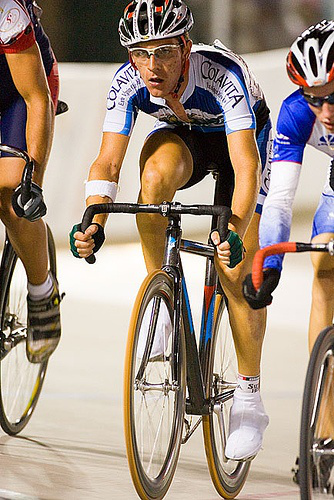

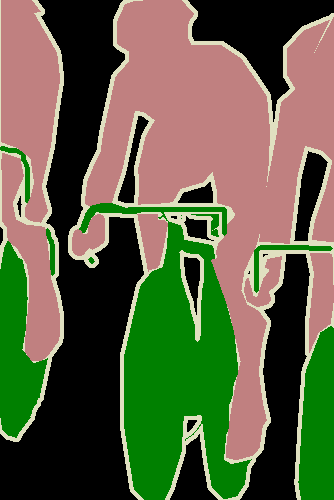

In [14]:
(image,target) = voc_val[4]
print(type(image),image.size)
print(type(target),target.size)
image.show()
display(image)
target.show()
display(target)

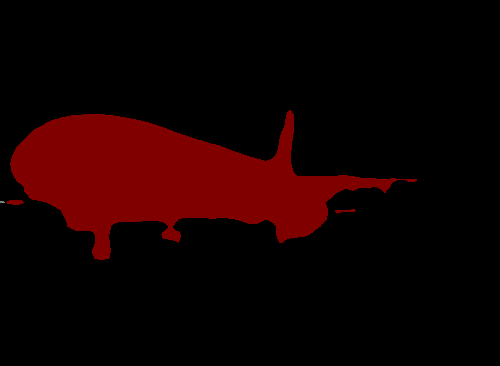

In [10]:
test_transform = T.Compose(
    [T.ToTensor(),
    T.Normalize(mean = [0.485,0.456,0.406],std=[0.229,0.224,0.225])]
)

input_tensor = test_transform(image)
input_batch = input_tensor.unsqueeze(0)

seg_model = models.segmentation.fcn_resnet101(pretrained=True)
seg_model.eval()
output = seg_model(input_batch)['out'][0]
output_pred = output.argmax(0)
target_pred = output_pred.numpy().astype(np.uint8)
img_pred = T.ToPILImage()(target_pred).convert('P')

color_palette = target.getpalette()
img_pred.putpalette(color_palette)
img_pred.show()
display(img_pred)